In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()

In [5]:
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

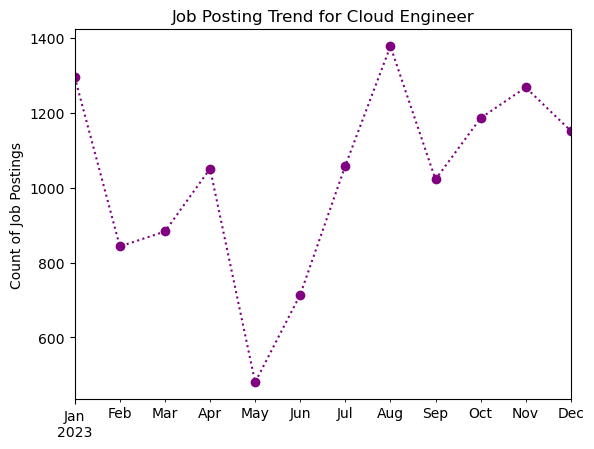

In [10]:
monthly_job_postings =df_ce.groupby('job_posted_month').size() 
monthly_job_postings.plot(kind='line',linestyle=':',color='purple',marker='o')
plt.title('Job Posting Trend for Cloud Engineer')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

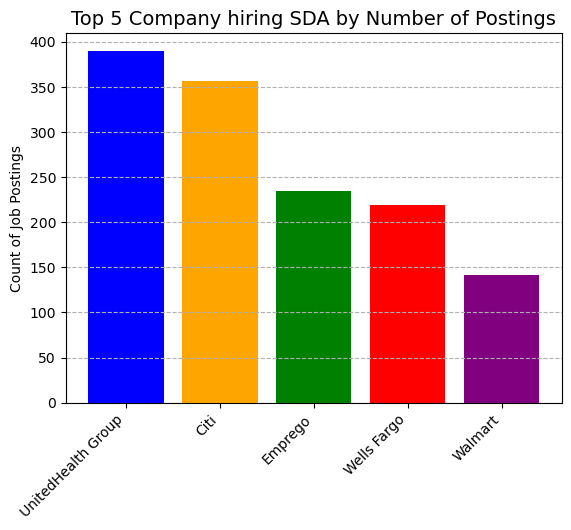

In [17]:
SDA_df = df[df['job_title_short']=='Senior Data Analyst'].copy()
top_5 = SDA_df['company_name'].value_counts().head(5)
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.bar(top_5.index,top_5.values,color=colors)
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.title('Top 5 Company hiring SDA by Number of Postings',fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--')
plt.show()